In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('../all_var_int.csv')
df.describe()

,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,total_reg_workers,women_reg_workers,num_of_active_job_cards,num_joint_acc_of_women,num_total_acc_of_women,num_women_beneficiary_worker_with_acc,num_women_beneficiary_active_worker_with_acc,tot_expenditure,tot_mandays,gw_stge_of_extraction
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5175.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,41076.712468,19873.782287,12602.858469,2408.266724,16449.579536,15557.887360,10773.214961,4319.087704,6.884994e+07,-456.060553
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,34379.827770,16262.322561,9007.231548,5387.560594,13534.272569,12013.081666,9030.064504,4116.178693,7.488405e+07,6975.643425
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-100000.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,19194.500000,9094.000000,6537.000000,120.000000,7428.500000,7527.000000,4787.000000,1477.500000,2.053185e+07,32.974058
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,30669.000000,15226.000000,10218.000000,551.000000,12281.000000,12078.000000,8107.000000,3172.000000,4.624726e+07,56.728903
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,51225.500000,25712.000000,16414.000000,2025.500000,21535.000000,20399.000000,13925.500000,5798.500000,9.129770e+07,76.093358
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,359381.000000,158219.000000,78340.000000,75184.000000,120982.000000,97587.000000,82105.000000,55644.000000,1.021685e+09,474.955968


In [2]:
demographics = ['total_households', 'total_population','sc_population', 'st_population', 'gen_population','hh_kutcha_wall_roof']
HealthNutrition = ['anaemic_pregnant_women', 'anaemic_adolescent_girls']
LivelihoodFactors = ['tot_area_unirrigated','crp_sq_km', 'cdi_value','hh_non_farm_activities']
common_cols = ["block_code", "FID_Key", "total_villages", "geog_area"]

cyclone_df = df[common_cols+demographics+HealthNutrition+LivelihoodFactors]
cyclone_df.loc[df['total_villages'].isna(), 'total_villages'] = 74

In [3]:
cyclone_df['crp_vul_index'] = (cyclone_df['crp_sq_km'] / cyclone_df['geog_area']) * (1 / (1 + cyclone_df['cdi_value']))
cyclone_df.drop(columns=['cdi_value', 'crp_sq_km'], inplace=True)

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_28443/2340756406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclone_df['crp_vul_index'] = (cyclone_df['crp_sq_km'] / cyclone_df['geog_area']) * (1 / (1 + cyclone_df['cdi_value']))
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_28443/2340756406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclone_df.drop(columns=['cdi_value', 'crp_sq_km'], inplace=True)


In [4]:
cyclone_df['hh_kutcha_wall_roof_ratio'] = cyclone_df['hh_kutcha_wall_roof'] / cyclone_df['total_households']
cyclone_df.drop(columns=['hh_kutcha_wall_roof'], inplace=True) 

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_28443/3987375096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclone_df['hh_kutcha_wall_roof_ratio'] = cyclone_df['hh_kutcha_wall_roof'] / cyclone_df['total_households']
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_28443/3987375096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclone_df.drop(columns=['hh_kutcha_wall_roof'], inplace=True)


In [7]:
cyclone_df.columns

Index(['block_code', 'FID_Key', 'total_villages', 'geog_area',
       'total_households', 'total_population', 'sc_population',
       'st_population', 'gen_population', 'anaemic_pregnant_women',
       'anaemic_adolescent_girls', 'tot_area_unirrigated',
       'hh_non_farm_activities', 'crp_vul_index', 'hh_kutcha_wall_roof_ratio'],
      dtype='object')

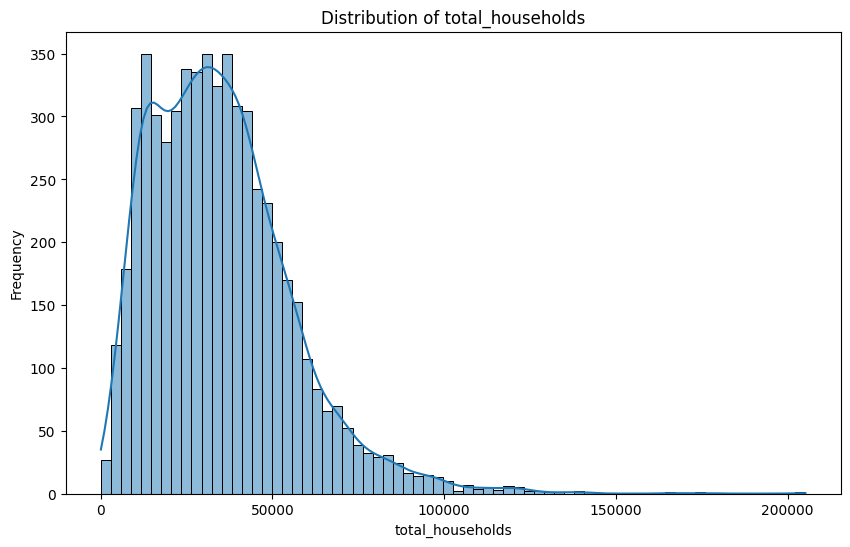

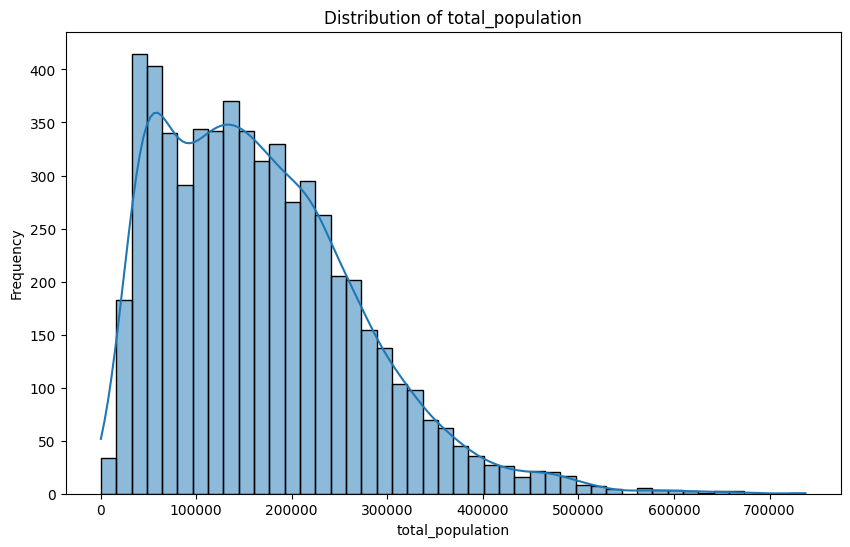

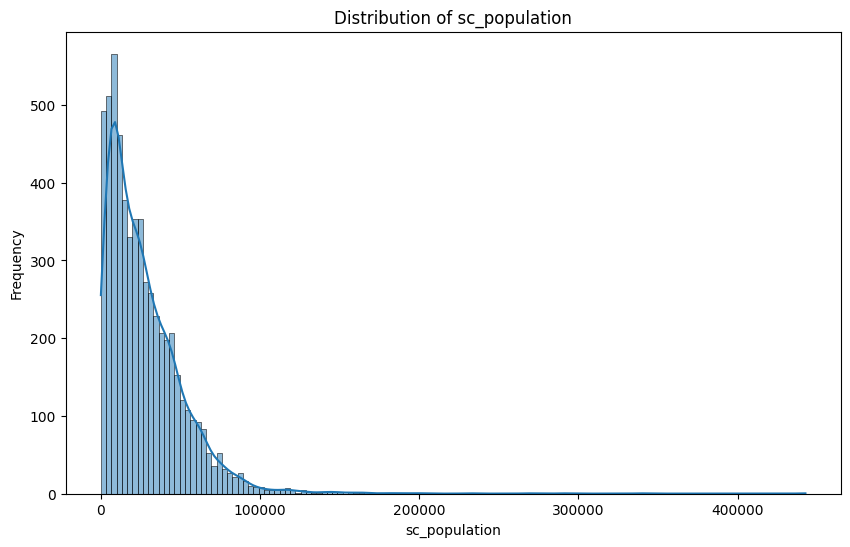

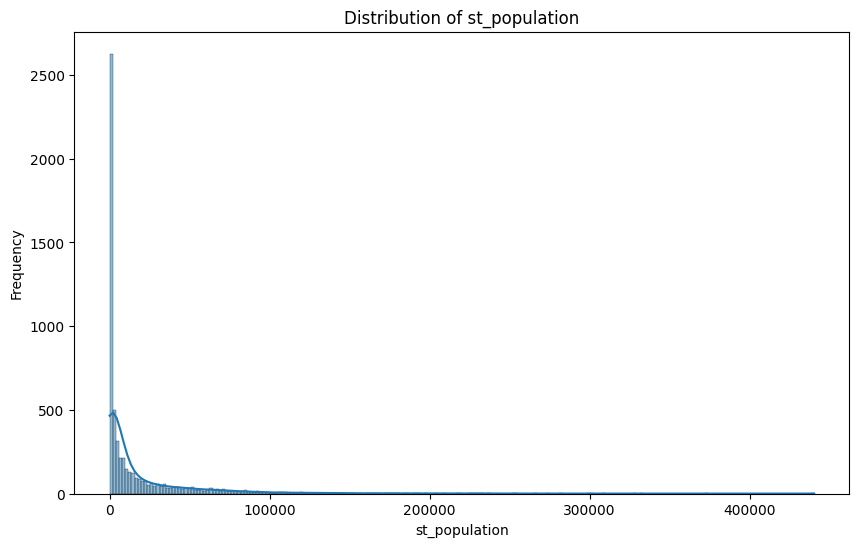

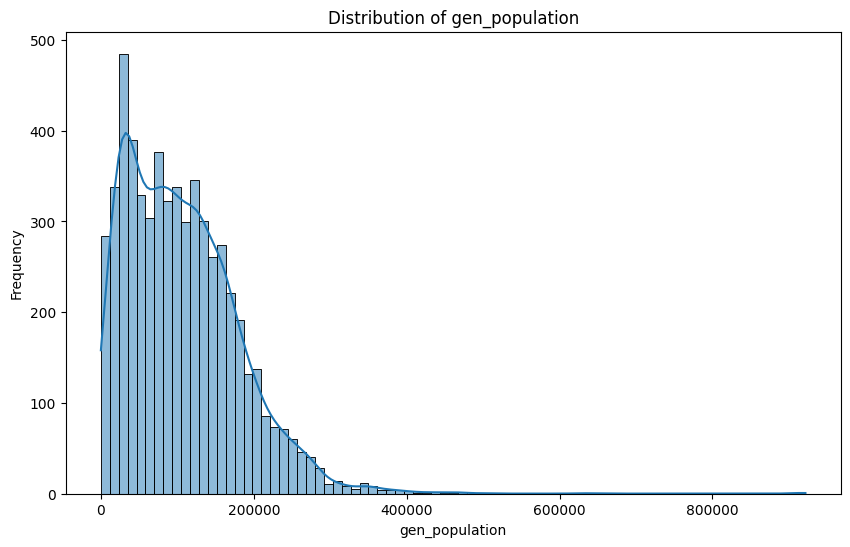

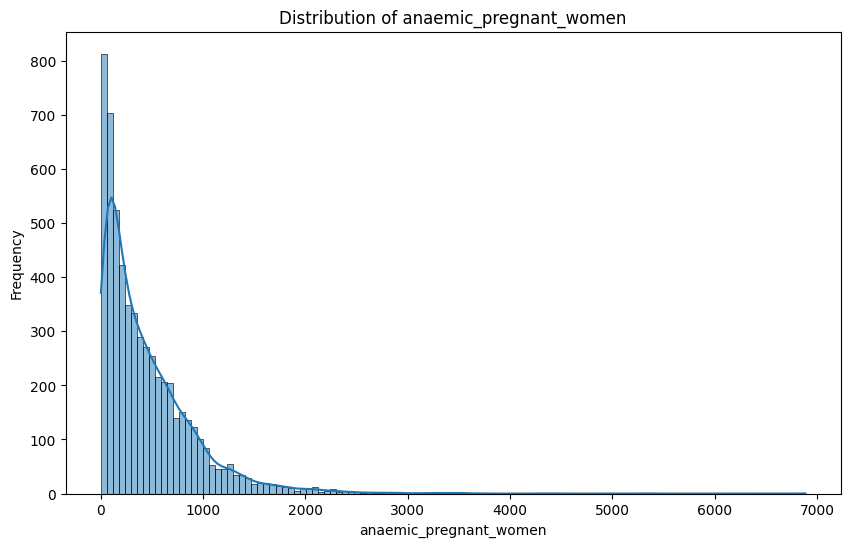

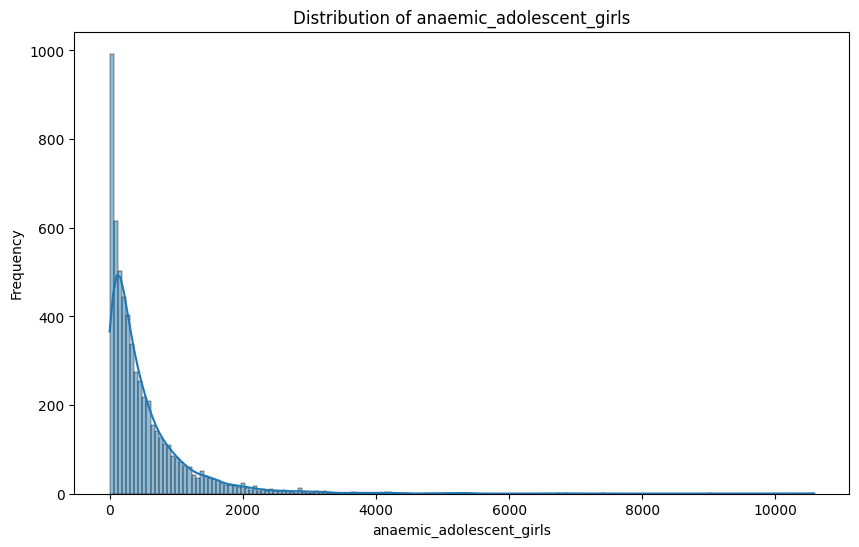

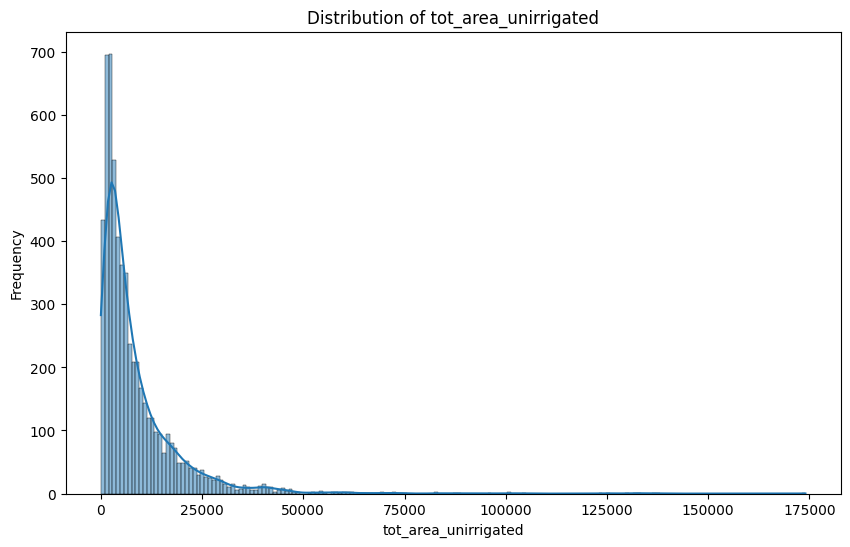

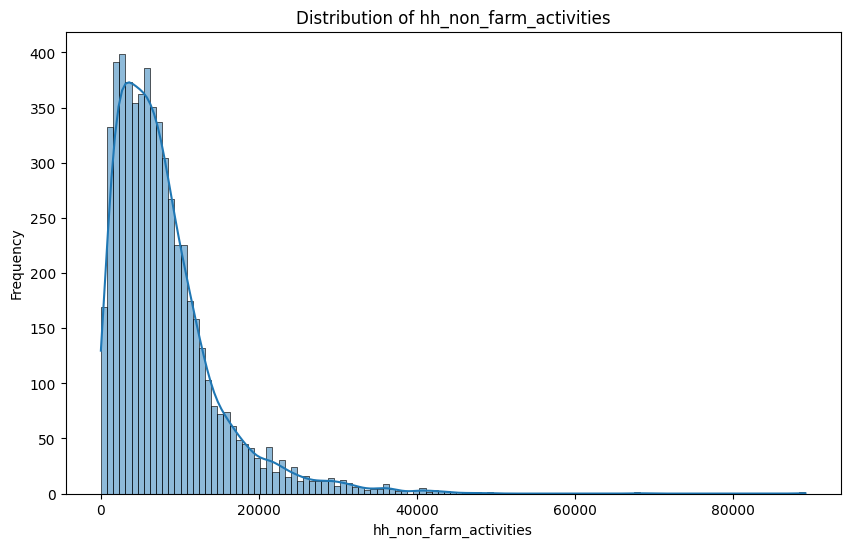

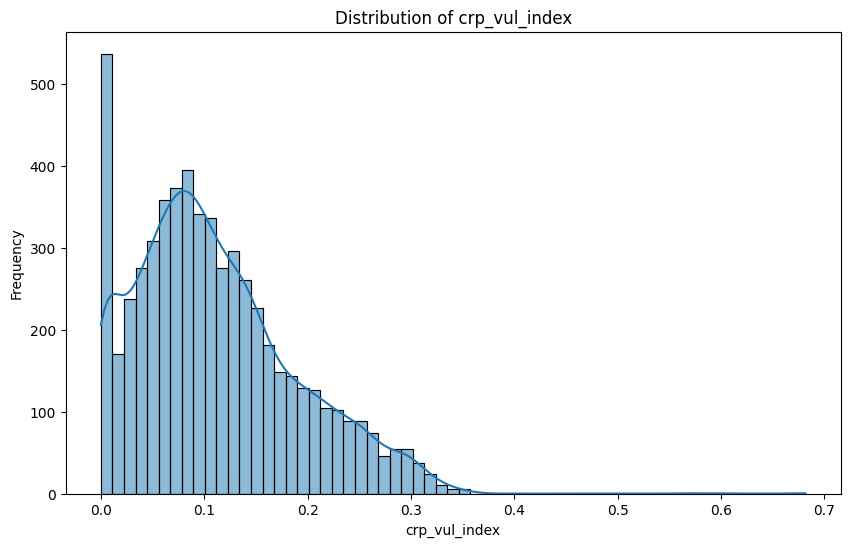

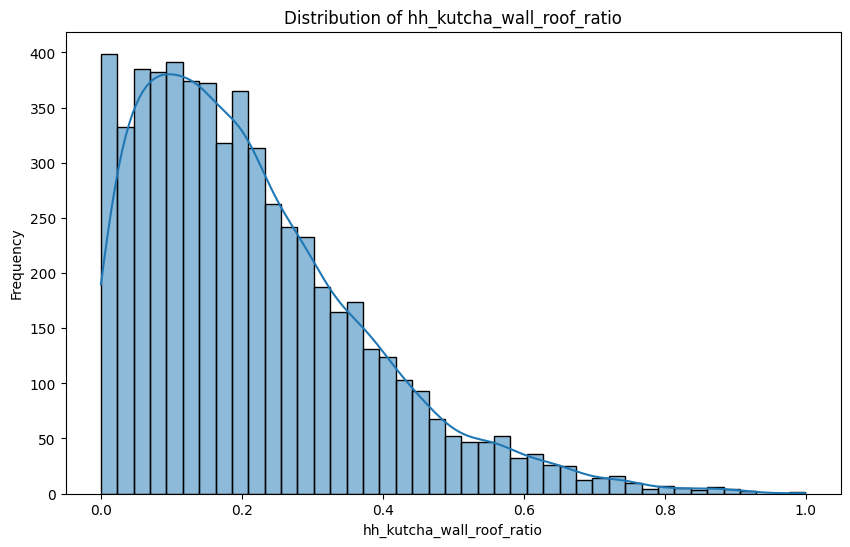

In [8]:
all_columns = ['total_households', 'total_population', 'sc_population',
       'st_population', 'gen_population', 'anaemic_pregnant_women',
       'anaemic_adolescent_girls', 'tot_area_unirrigated',
       'hh_non_farm_activities', 'crp_vul_index', 'hh_kutcha_wall_roof_ratio']

for column in all_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(cyclone_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
scaler = RobustScaler()

df_scaled = cyclone_df.copy()

df_scaled[all_columns] = scaler.fit_transform(df_scaled[all_columns])

In [10]:
df_pca = df_scaled.drop(columns=['block_code', 'FID_Key','total_villages', 'geog_area'],errors='ignore')
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca)

PCA()

In [11]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)



,% variance,Cumulative %
0,0.355,0.355
1,0.260,0.615
2,0.126,0.741
3,0.101,0.842
4,0.050,0.892
5,0.038,0.930
6,0.025,0.955
7,0.022,0.977
8,0.014,0.991
9,0.006,0.997


In [12]:
PCA_weights = pcaSummary_df['% variance']

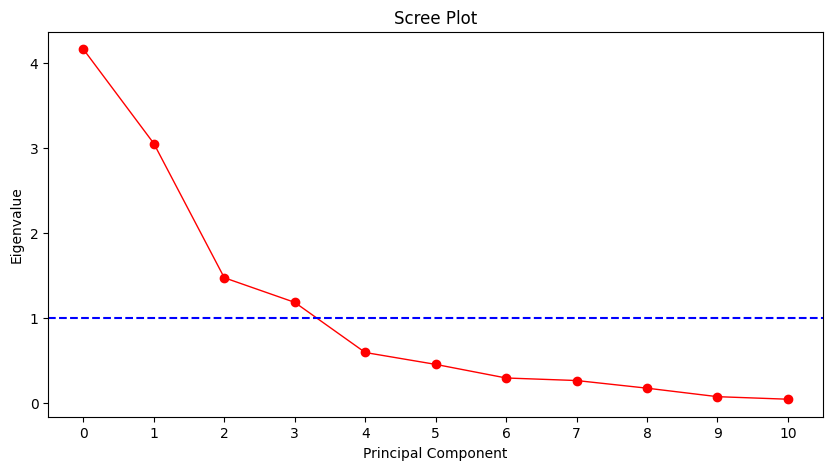

In [13]:
# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [14]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=4)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(4)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                                PC1       PC2       PC3       PC4
total_households           0.145627  0.359614 -0.000417 -0.209045
total_population           0.120697  0.344106 -0.032985 -0.151564
sc_population              0.004122  0.332148 -0.003478 -0.208367
st_population              0.861248 -0.337679 -0.175608 -0.263447
gen_population             0.021272  0.348135  0.019667 -0.141175
anaemic_pregnant_women     0.200018  0.309612 -0.153410  0.326556
anaemic_adolescent_girls   0.289136  0.347180 -0.224809  0.663054
tot_area_unirrigated       0.249574  0.111572  0.932363  0.147620
hh_non_farm_activities     0.085224  0.370844 -0.015920 -0.449562
crp_vul_index             -0.083203  0.127077 -0.147848  0.020510
hh_kutcha_wall_roof_ratio  0.148078 -0.155582  0.046778  0.173146


In [15]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Cyclone_Sensitivity_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   block_code  FID_Key  total_villages   geog_area  total_households  \
0        6498        1             7.0  1199.52279         -1.154689   
1        6492        4            82.0  1505.90407         -0.796248   
2        4689       56            30.0   290.78289          0.588605   
3        4690       57            17.0   294.23585         -0.786435   
4        4692       58            19.0   339.99146         -0.718274   

   total_population  sc_population  st_population  gen_population  \
0         -1.022554      -0.714365      -0.119392       -0.836233   
1         -0.779233      -0.714365      -0.159665       -0.539948   
2          0.066463      -0.113952       0.083911        0.171953   
3         -0.750355      -0.517782       0.096632       -0.609594   
4         -0.687369      -0.388068       0.077522       -0.566514   

   anaemic_pregnant_women  anaemic_adolescent_girls  tot_area_unirrigated  \
0               -0.586239                 -0.481949             -0.599602  

In [16]:
# Multiply each PCA component score by its weight
df["Cyclone_Sensitivity_Index"] = (
    PCA_weights[0] * df_scaled["Cyclone_Sensitivity_PC1"] +
    PCA_weights[1] * df_scaled["Cyclone_Sensitivity_PC2"] +
    PCA_weights[2] * df_scaled["Cyclone_Sensitivity_PC3"] +
    PCA_weights[3] * df_scaled["Cyclone_Sensitivity_PC4"]
)

# Display the flood_exposure Index
print(df[["block_code", "Cyclone_Sensitivity_Index"]].head())

   block_code  Cyclone_Sensitivity_Index
0        6498                  -1.268914
1        6492                  -0.890408
2        4689                  -0.043672
3        4690                  -0.444133
4        4692                  -0.304593


In [18]:
df["Cyclone_Sensitivity_Index"].describe()

count    5.815000e+03
mean    -3.910123e-17
std      8.754148e-01
min     -1.268914e+00
25%     -6.194098e-01
50%     -1.980502e-01
75%      3.867802e-01
max      8.203920e+00
Name: Cyclone_Sensitivity_Index, dtype: float64